In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Try using the 'on_bad_lines' parameter to handle problematic lines
data = pd.read_csv('/content/MOVIE.csv', engine='python', on_bad_lines='skip')  # or 'warn'
data

,id,title,vote_average,vote_count,release_date,revenue,runtime,budget,overview,popularity,...,Star2,Star3,Star4,Writer,Director_of_Photography,Producers,Music_Composer,genres_list,Cast_list,all_combined_keywords
0,27205,Inception,8.364,34495,7/15/2010,825532764,148,160000000,"Cobb, a skilled thief who commits corporate es...",83.952,...,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,Christopher Nolan,Wally Pfister,"Thomas Tull, Christopher Nolan, Chris Brigham,...",Hans Zimmer,"['Action', 'Science Fiction', 'Adventure']","['Tim Kelleher', 'Silvie Laguna', 'Natasha Bea...","['s', 'philosophy', 'skilled', 'kidnapping', '..."
1,157336,Interstellar,8.417,32571,11/5/2014,701729206,169,165000000,The adventures of a group of explorers who mak...,140.241,...,Anne Hathaway,Jessica Chastain,Mackenzie Foy,Jonathan Nolan,Hoyte van Hoytema,"Jake Myers, Emma Thomas, Jordan Goldberg, Thom...",Hans Zimmer,"['Adventure', 'Drama', 'Science Fiction']","['Jeff Hephner', 'William Devane', 'Elyes Gabe...","['thoughtful', 'use', 'scientist', 'quantum me..."
2,155,The Dark Knight,8.512,30619,7/16/2008,1004558444,152,185000000,Batman raises the stakes in his war on crime. ...,130.643,...,Heath Ledger,Aaron Eckhart,Michael Caine,Jonathan Nolan,Wally Pfister,"Kevin De La Noy, Thomas Tull, Christopher Nola...","Hans Zimmer, James Newton Howard","['Drama', 'Action', 'Crime', 'Thriller']","['Tommy Lister Jr.', 'Edison Chen', 'Beatrice ...","['reign', 'harvey', 'proves', 'partnership', '..."
3,19995,Avatar,7.573,29815,12/15/2009,2923706026,162,237000000,"In the 22nd century, a paraplegic Marine is di...",79.932,...,Zoe Saldana,Sigourney Weaver,Michelle Rodriguez,James Cameron,Mauro Fiore,"Jon Landau, Colin Wilson, Laeta Kalogridis, Ja...",James Horner,"['Action', 'Adventure', 'Fantasy', 'Science Fi...","['Carvon Futrell', 'Joel David Moore', 'Jon Cu...","['space war', 'civilization', 'society', 'mari..."
4,24428,The Avengers,7.710,29166,4/25/2012,1518815515,143,220000000,When an unexpected enemy emerges and threatens...,98.082,...,Chris Evans,Scarlett Johansson,Jeremy Renner,Sydney Newman,NaN,NaN,NaN,"['Science Fiction', 'Action', 'Adventure']","['Haneyuri', 'Nako Mizusawa', 'Marin', 'Rikako...","['s', 'world', 'begins', 'e', 'global safety',..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,750844,25 Years,0.000,0,8/28/2020,0,72,0,A documentary about the Antaris Project Festiv...,0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Documentary'],"['Rebecca Jensen Uesugi', 'Patrick Zhang', 'Ja...","['peace', 'antaris', 'movement', 'music festiv..."
1048571,750810,عالم مضحك جداً,0.000,0,3/4/1968,0,116,0,One of the princesses dies after hiding some o...,0.627,...,NaN,NaN,NaN,Eli Heaton,NaN,"Mason Mecartea, John Thomas Dickson",NaN,"['Adventure', 'Comedy', 'Drama', 'Mystery']","['Brice Hartwich', 'Callie Bacon', 'Mason Meca...","['palace servants', 'staying', 'ashour', 'seek..."
1048572,750786,Marcel Broodthaers en conversation avec Hideak...,0.000,0,NaN,0,6,0,The pharaoh’s body deforms and the landscape i...,0.600,...,NaN,NaN,NaN,Dmytro Kucherov,"Taisa Kucherova, Yevhen Sarazhyn",Dmytro Kucherov,NaN,['Unknown'],['Dmytro Kucherov'],"['s', 'hideaki anno', 'pharaoh ’ s body deform..."
1048573,750787,grand-maman Piano,0.000,0,10/20/2020,0,5,0,"This experimental autobiographical film, in wh...",0.600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Documentary'],['Unknown'],"['s', 'moments', 'audiovisual', 'faded', 'feat..."


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from scipy import stats

# Use 'on_bad_lines' instead of 'error_bad_lines'
data = pd.read_csv('/content/MOVIE.csv', engine='python', on_bad_lines='skip')
print("Initial dataset  overview:")
print(data.info())
print("\n Missing value summary:")
print(data.isnull().sum())

data['budget'] = pd.to_numeric(data['budget'], errors='coerce')
NUM_COLS = data.select_dtypes(include=['float64','int64']).columns
CAT_COLS = data.select_dtypes(include=['object']).columns

print(data.isnull().sum())

Initial dataset  overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101913 entries, 0 to 101912
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       101913 non-null  int64  
 1   title                    101913 non-null  object 
 2   vote_average             101913 non-null  float64
 3   vote_count               101913 non-null  int64  
 4   release_date             101848 non-null  object 
 5   revenue                  101913 non-null  int64  
 6   runtime                  101913 non-null  int64  
 7   budget                   101913 non-null  int64  
 8   overview                 99967 non-null   object 
 9   popularity               101913 non-null  float64
 10  tagline                  41308 non-null   object 
 11  production_companies     86045 non-null   object 
 12  production_countries     95520 non-null   object 
 13  spoken_languages         98379 n

Average Revenue by Genre Type:
Genre_Type
Mixed     1.023589e+07
Single    1.399323e+06
Name: revenue, dtype: float64

Average Rating by Genre Type:
Genre_Type
Mixed     6.561370
Single    6.433969
Name: IMDB_Rating, dtype: float64


<ipython-input-3-17fc50ca07bf>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue.index, y=avg_revenue.values, palette='viridis')
<ipython-input-3-17fc50ca07bf>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='coolwarm')


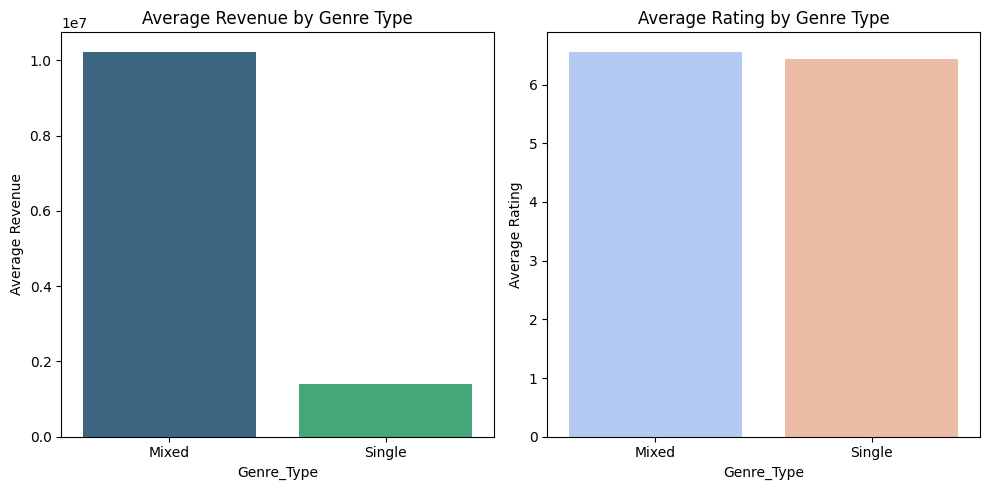

In [ ]:
##ow does the distribution of genres impact a movie's success?Do movies with mixed genres (e.g., action-comedy, drama-thriller) perform better in terms of revenue and ratings than single-genre films?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Check if genres are already lists, if not, split by commas
data['genres_list'] = data['genres_list'].apply(lambda x: x if isinstance(x, list) else x.split(','))

# Create a new 'Genre_Type' column to identify mixed vs. single-genre movies
data['Genre_Type'] = data['genres_list'].apply(lambda x: 'Mixed' if len(x) > 1 else 'Single')

# Calculate average revenue and rating for mixed and single-genre movies
avg_revenue = data.groupby('Genre_Type')['revenue'].mean()
avg_rating = data.groupby('Genre_Type')['IMDB_Rating'].mean()

print("Average Revenue by Genre Type:")
print(avg_revenue)

print("\nAverage Rating by Genre Type:")
print(avg_rating)

# Plotting the results
plt.figure(figsize=(10, 5))

# Plot for average revenue (red color)
plt.subplot(1, 2, 1)
sns.barplot(x=avg_revenue.index, y=avg_revenue.values, palette='viridis')
plt.title('Average Revenue by Genre Type')
plt.ylabel('Average Revenue')

# Plot for average rating (blue color)
plt.subplot(1, 2, 2)
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='coolwarm')
plt.title('Average Rating by Genre Type')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()


Average Revenue by Certificate:
Certificate
A            1.092372e+08
Approved     1.423585e+07
G            6.409486e+07
GP           5.200000e+06
NC-17        1.671932e+07
Not Rated    1.134762e+07
PG           4.228433e+07
PG-13        5.573372e+07
Passed       2.153071e+07
R            3.401284e+07
TV-14        1.534652e+06
TV-MA        6.741056e+06
TV-PG        1.054648e+08
U            1.488468e+08
U/A          3.773102e+07
UA           2.652173e+08
Unrated      4.645555e+06
X            1.023848e+07
Name: revenue, dtype: float64

Average Viewer Rating by Certificate:
Certificate
A            7.988426
Approved     7.664706
G            6.749791
GP           7.600000
NC-17        6.625806
Not Rated    6.974572
PG           6.318273
PG-13        6.291744
Passed       7.975862
R            6.447030
TV-14        6.300000
TV-MA        6.856250
TV-PG        7.500000
U            7.947191
U/A          7.600000
UA           7.946000
Unrated      6.638571
X            6.250000
Name: IMDB_

<ipython-input-49-83c3801ef434>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue_by_certificate.index, y=avg_revenue_by_certificate.values, palette='Blues')
<ipython-input-49-83c3801ef434>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_viewer_rating_by_certificate.index, y=avg_viewer_rating_by_certificate.values, palette='Greens')


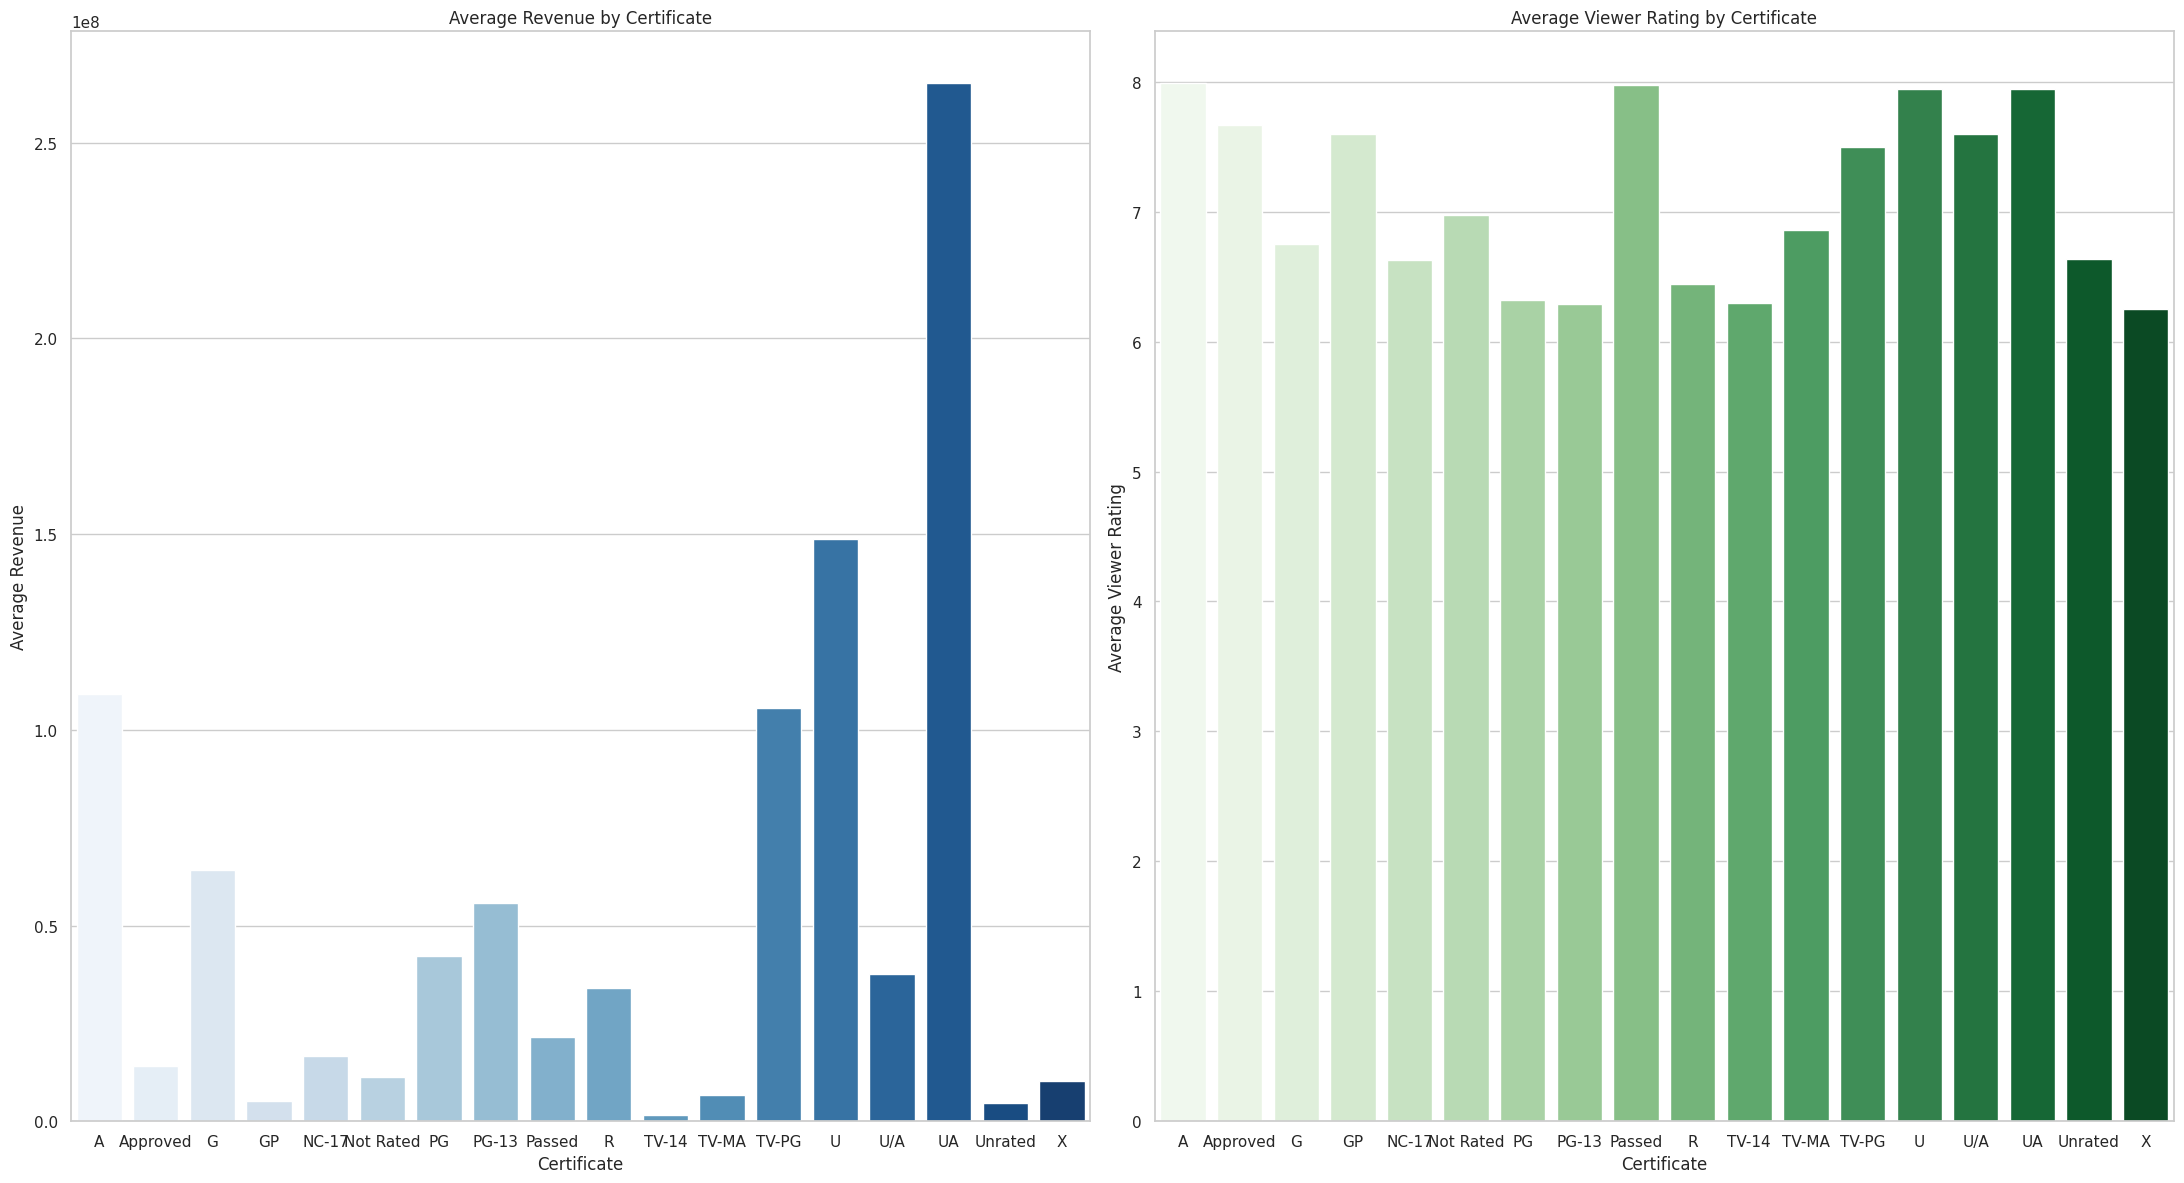

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame

# Group by 'Certificate' and calculate average revenue and rating
avg_revenue_by_certificate = data.groupby('Certificate')['revenue'].mean()
avg_viewer_rating_by_certificate = data.groupby('Certificate')['IMDB_Rating'].mean()

print("Average Revenue by Certificate:")
print(avg_revenue_by_certificate)

print("\nAverage Viewer Rating by Certificate:")
print(avg_viewer_rating_by_certificate)

# Plotting the results
plt.figure(figsize=(22, 12))

# Plot for average revenue by certificate
plt.subplot(1, 2, 1)
sns.barplot(x=avg_revenue_by_certificate.index, y=avg_revenue_by_certificate.values, palette='Blues')
plt.title('Average Revenue by Certificate')
plt.ylabel('Average Revenue')
plt.xlabel('Certificate')

# Plot for average viewer rating by certificate
plt.subplot(1, 2, 2)
sns.barplot(x=avg_viewer_rating_by_certificate.index, y=avg_viewer_rating_by_certificate.values, palette='Greens')
plt.title('Average Viewer Rating by Certificate')
plt.ylabel('Average Viewer Rating')
plt.xlabel('Certificate')

plt.tight_layout()
plt.show()


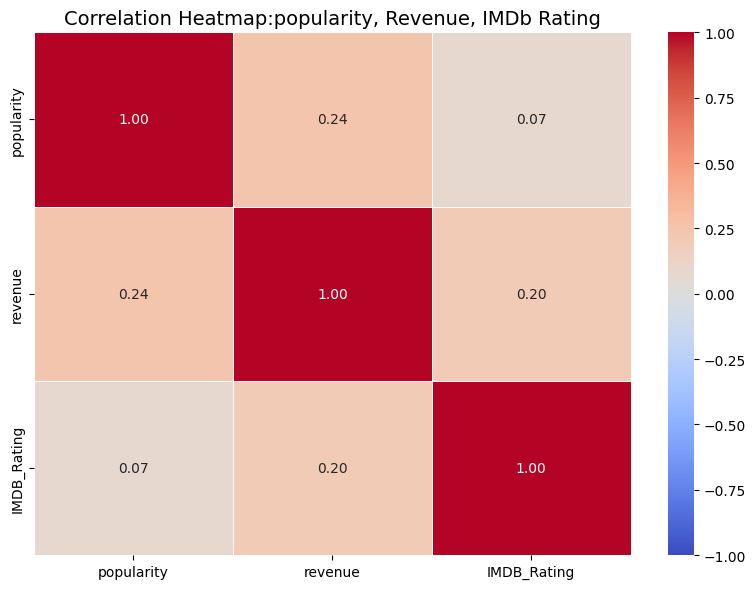

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the relevant columns

# Calculate the correlation matrix, use 'lead_actor_popularity' instead of 'actor_popularity'
correlation_matrix = data[['popularity','revenue', 'IMDB_Rating']].corr()

# Create a heatmap with annotations and formatting
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Add title
plt.title("Correlation Heatmap:popularity, Revenue, IMDb Rating", fontsize=14)

# Show plot
plt.tight_layout()
plt.show()

Average Revenue by Release Window:
Release_Window
OTHER     5.646778e+06
SUMMER    9.947346e+06
WINTER    1.060371e+07
Name: revenue, dtype: float64

Average IMDb Rating by Release Window:
Release_Window
OTHER     6.508209
SUMMER    6.569838
WINTER    6.600829
Name: IMDB_Rating, dtype: float64


<ipython-input-18-3bb1415977c5>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_revenue.index, y=avg_revenue.values, palette='Blues')
<ipython-input-18-3bb1415977c5>:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='Greens')


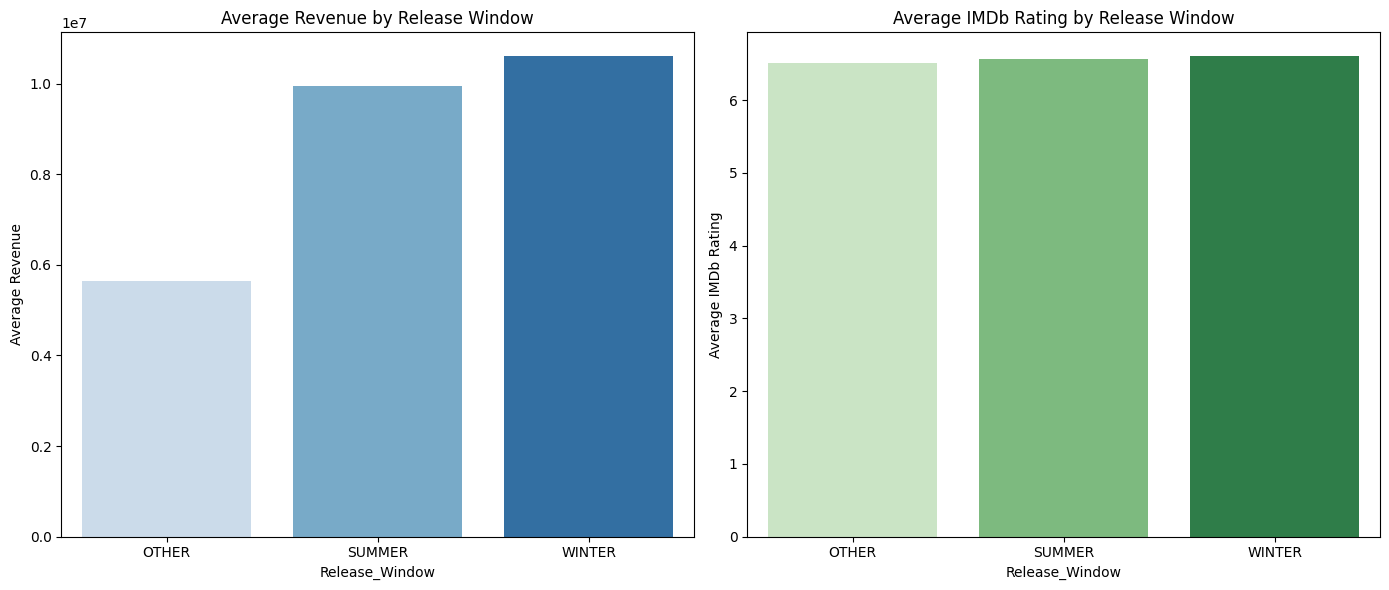

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame and it contains 'release_date', 'revenue', and 'IMDB_Rating'

# Convert 'release_date' to datetime format, with 'errors' set to 'coerce' to handle invalid dates
data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')

# Remove rows where 'release_date' is NaT (not a valid date)
data = data.dropna(subset=['release_date'])

# Define function to classify the release window
def release_window(date):
    month = date.month
    day = date.day

    # Summer (June to August)
    if 6 <= month <= 8:
        return 'SUMMER'

    # WINTER (December)
    elif month == 12:
        return 'WINTER'

    # Other periods
    else:
        return 'OTHER'

# Apply the function to create a new column 'Release_Window'
data['Release_Window'] = data['release_date'].apply(release_window)

# Group by 'Release_Window' and calculate average revenue and IMDb rating
avg_revenue = data.groupby('Release_Window')['revenue'].mean()
avg_rating = data.groupby('Release_Window')['IMDB_Rating'].mean()

print("Average Revenue by Release Window:")
print(avg_revenue)

print("\nAverage IMDb Rating by Release Window:")
print(avg_rating)

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot for average revenue
plt.subplot(1, 2, 1)
sns.barplot(x=avg_revenue.index, y=avg_revenue.values, palette='Blues')
plt.title('Average Revenue by Release Window')
plt.ylabel('Average Revenue')

# Plot for average IMDb rating
plt.subplot(1, 2, 2)
sns.barplot(x=avg_rating.index, y=avg_rating.values, palette='Greens')
plt.title('Average IMDb Rating by Release Window')
plt.ylabel('Average IMDb Rating')

plt.tight_layout()
plt.show()



<ipython-input-20-e55777dc0bcd>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='genres_list', y='revenue', data=genre_revenue.head(10), palette='viridis')


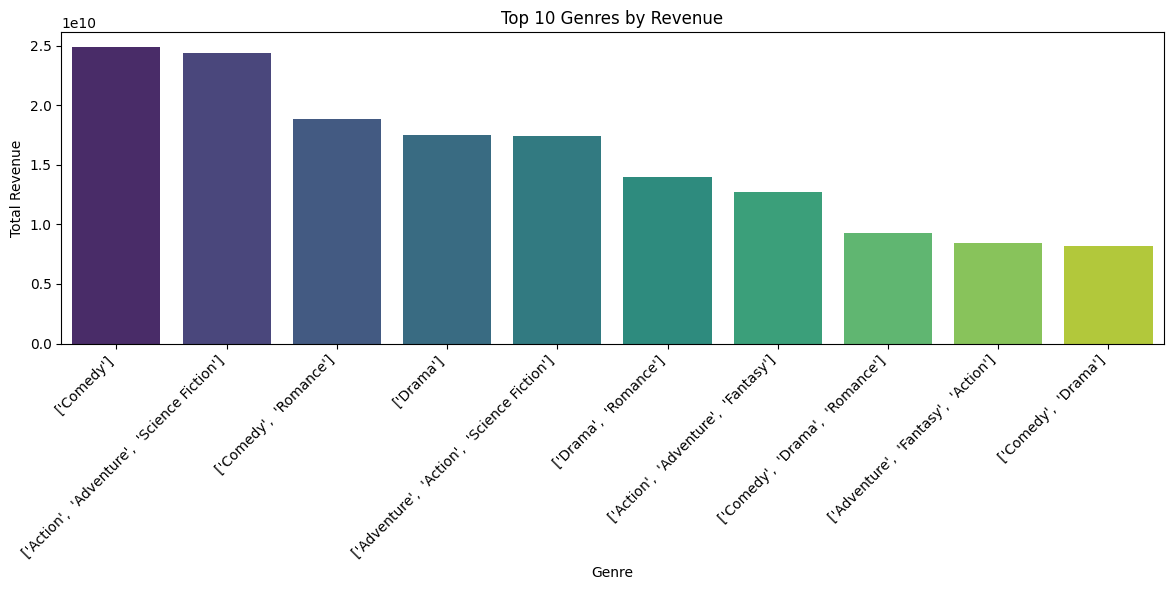

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with 'genres_list' and 'revenue'

# Convert lists in 'genres_list' to strings
data['genres_list'] = data['genres_list'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

# Group by 'genres_list' and calculate the total revenue for each genre
genre_revenue = data.groupby('genres_list')['revenue'].sum().reset_index()

# Sort the results in descending order of revenue
genre_revenue = genre_revenue.sort_values(by='revenue', ascending=False)

# Create a bar plot for Genre vs Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='genres_list', y='revenue', data=genre_revenue.head(10), palette='viridis')
plt.title('Top 10 Genres by Revenue')
plt.xlabel('Genre')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Correlation between Number of Production Countries and Revenue: 0.042347142226003255
Correlation between Number of Production Countries and IMDb Rating: 0.02167403639767218


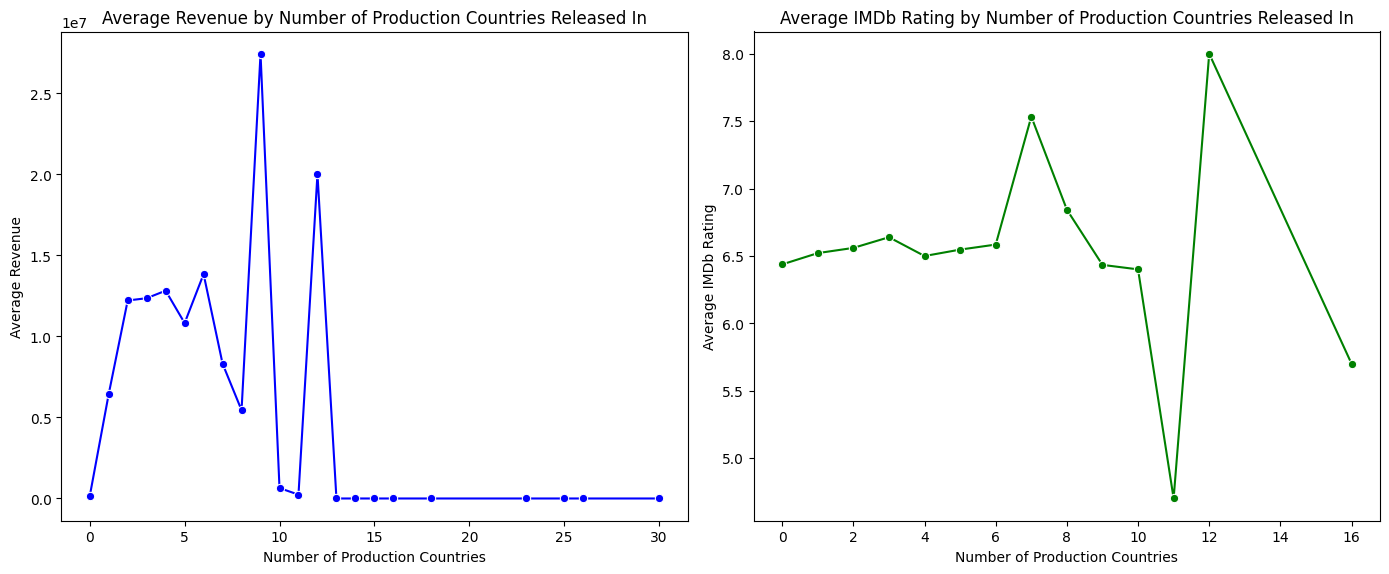

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with 'production_countries', 'revenue', and 'IMDB_Rating'

# Create a new column for the number of production countries
data['num_production_countries'] = data['production_countries'].apply(
    lambda x: len(x.split(',')) if isinstance(x, str) else 0
)

# Check the correlation
correlation_revenue = data['num_production_countries'].corr(data['revenue'])
correlation_rating = data['num_production_countries'].corr(data['IMDB_Rating'])

print(f"Correlation between Number of Production Countries and Revenue: {correlation_revenue}")
print(f"Correlation between Number of Production Countries and IMDb Rating: {correlation_rating}")

# Grouping by the new column and calculating averages
avg_revenue = data.groupby('num_production_countries')['revenue'].mean()
avg_rating = data.groupby('num_production_countries')['IMDB_Rating'].mean()

# Plotting the results
plt.figure(figsize=(14, 6))

# Plot for average revenue
plt.subplot(1, 2, 1)
sns.lineplot(x=avg_revenue.index, y=avg_revenue.values, marker='o', color='blue')
plt.title('Average Revenue by Number of Production Countries Released In')
plt.xlabel('Number of Production Countries')
plt.ylabel('Average Revenue')

# Plot for average IMDb rating
plt.subplot(1, 2, 2)
sns.lineplot(x=avg_rating.index, y=avg_rating.values, marker='o', color='green')
plt.title('Average IMDb Rating by Number of Production Countries Released In')
plt.xlabel('Number of Production Countries')
plt.ylabel('Average IMDb Rating')

plt.tight_layout()
plt.show()


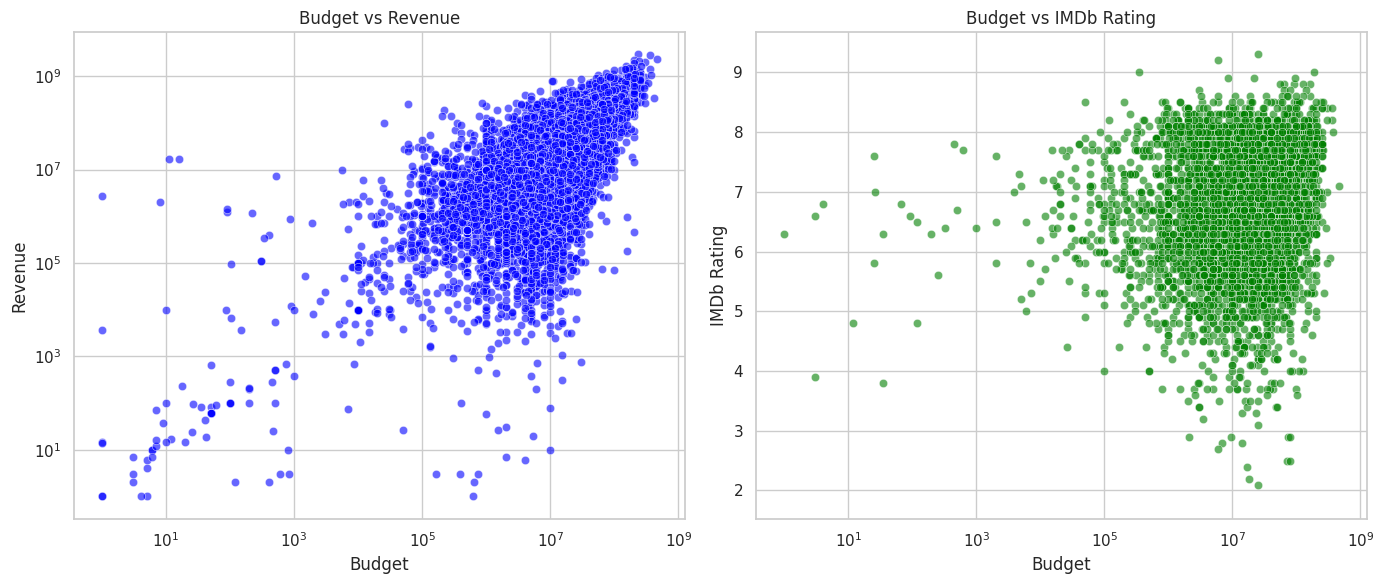

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with 'budget', 'revenue', and 'IMDB_Rating'

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure to hold both scatter plots
plt.figure(figsize=(14, 6))

# Scatter plot for Budget vs Revenue
plt.subplot(1, 2, 1)
sns.scatterplot(x='budget', y='revenue', data=data, color='blue', alpha=0.6)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.xscale('log')  # Optional: Use log scale if budgets vary widely
plt.yscale('log')  # Optional: Use log scale if revenues vary widely
plt.tight_layout()

# Scatter plot for Budget vs IMDb Rating
plt.subplot(1, 2, 2)
sns.scatterplot(x='budget', y='IMDB_Rating', data=data, color='green', alpha=0.6)
plt.title('Budget vs IMDb Rating')
plt.xlabel('Budget')
plt.ylabel('IMDb Rating')
plt.xscale('log')  # Optional: Use log scale if budgets vary widely
plt.tight_layout()

# Show the plots
plt.show()


<ipython-input-23-2d4725c7ebc7>:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_popularity = data.groupby('vote_average_bin')['popularity'].mean().reset_index()
<ipython-input-23-2d4725c7ebc7>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote_average_bin', y='popularity', data=avg_popularity, palette='coolwarm')


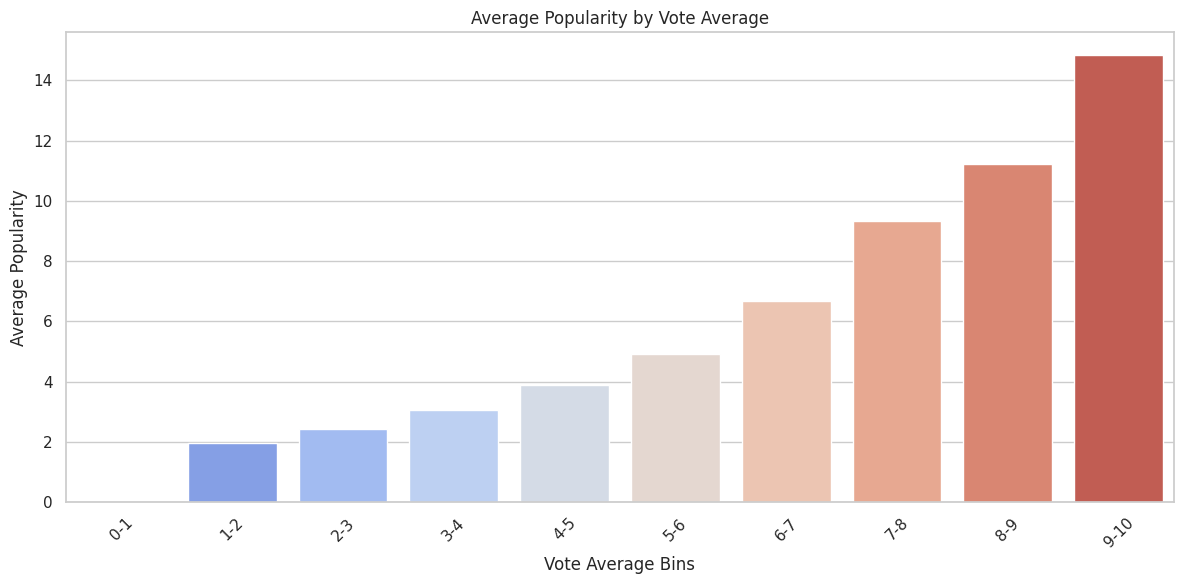

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with 'vote_average' and 'popularity'

# Create bins for vote averages (adjust the bins as necessary)
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
labels = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10']

# Create a new column for binned vote averages
data['vote_average_bin'] = pd.cut(data['vote_average'], bins=bins, labels=labels, right=False)

# Calculate average popularity for each vote average bin
avg_popularity = data.groupby('vote_average_bin')['popularity'].mean().reset_index()

# Create a bar chart for Vote Average vs Average Popularity
plt.figure(figsize=(12, 6))
sns.barplot(x='vote_average_bin', y='popularity', data=avg_popularity, palette='coolwarm')
plt.title('Average Popularity by Vote Average')
plt.xlabel('Vote Average Bins')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)  # Optional: Adjusts x-axis labels for better readability
plt.tight_layout()
plt.show()


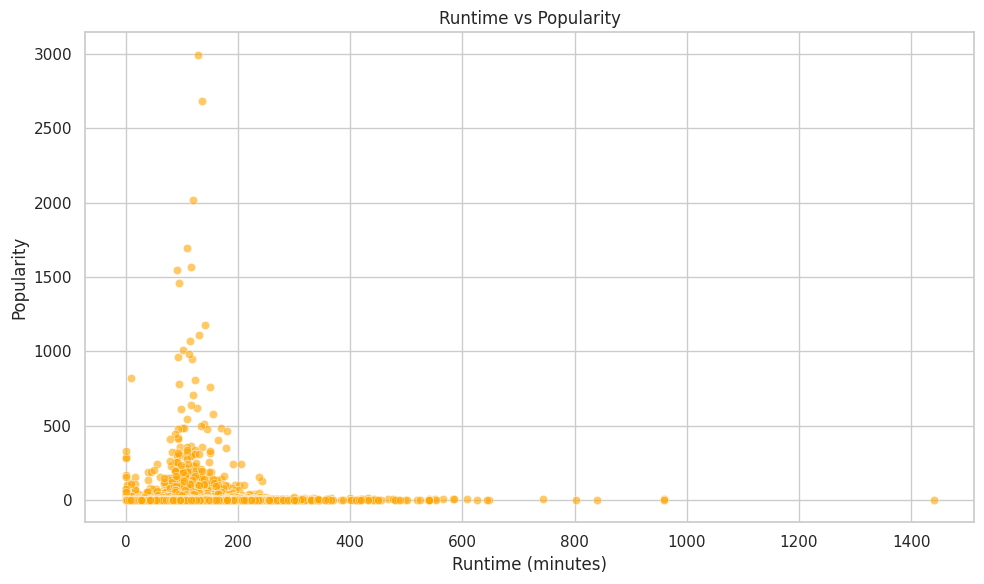

Correlation between Runtime and Popularity: 0.07706498489094915
Correlation between Runtime and Revenue: 0.10198836429810182


<ipython-input-24-f35c2654359f>:35: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_performance = data.groupby('runtime_category').agg({'popularity': 'mean', 'revenue': 'mean'}).reset_index()
<ipython-input-24-f35c2654359f>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runtime_category', y='popularity', data=avg_performance, palette='coolwarm')


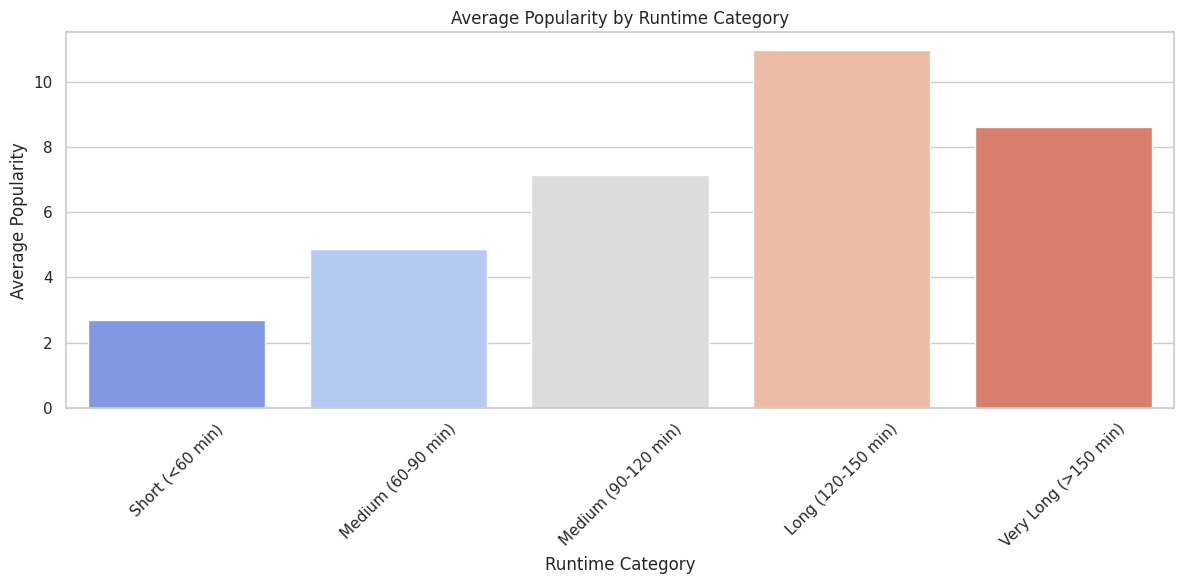

<ipython-input-24-f35c2654359f>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='runtime_category', y='revenue', data=avg_performance, palette='coolwarm')


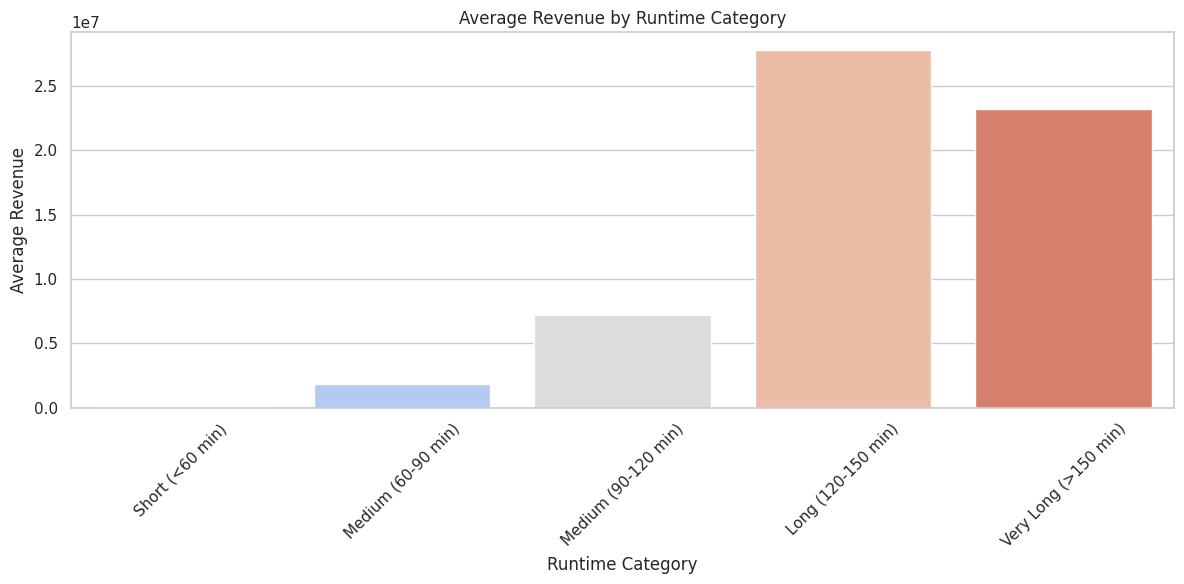

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with 'runtime', 'popularity', and 'revenue'

# Set the style for the plots
sns.set(style="whitegrid")

# Scatter plot for Runtime vs Popularity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='runtime', y='popularity', data=data, color='orange', alpha=0.6)
plt.title('Runtime vs Popularity')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Popularity')
plt.tight_layout()
plt.show()

# Calculate the correlation coefficient
correlation_popularity = data['runtime'].corr(data['popularity'])
print(f"Correlation between Runtime and Popularity: {correlation_popularity}")

# Calculate the correlation coefficient for Revenue as well
correlation_revenue = data['runtime'].corr(data['revenue'])
print(f"Correlation between Runtime and Revenue: {correlation_revenue}")

# Define categories for runtime
bins = [0, 60, 90, 120, 150, 180]  # Adjust these bins as needed
labels = ['Short (<60 min)', 'Medium (60-90 min)', 'Medium (90-120 min)', 'Long (120-150 min)', 'Very Long (>150 min)']

# Create a new column for binned runtime
data['runtime_category'] = pd.cut(data['runtime'], bins=bins, labels=labels, right=False)

# Calculate average popularity and revenue for each runtime category
avg_performance = data.groupby('runtime_category').agg({'popularity': 'mean', 'revenue': 'mean'}).reset_index()

# Plotting average popularity and revenue by runtime category
plt.figure(figsize=(12, 6))
sns.barplot(x='runtime_category', y='popularity', data=avg_performance, palette='coolwarm')
plt.title('Average Popularity by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)  # Optional: Adjusts x-axis labels for better readability
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='runtime_category', y='revenue', data=avg_performance, palette='coolwarm')
plt.title('Average Revenue by Runtime Category')
plt.xlabel('Runtime Category')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)  # Optional: Adjusts x-axis labels for better readability
plt.tight_layout()
plt.show()


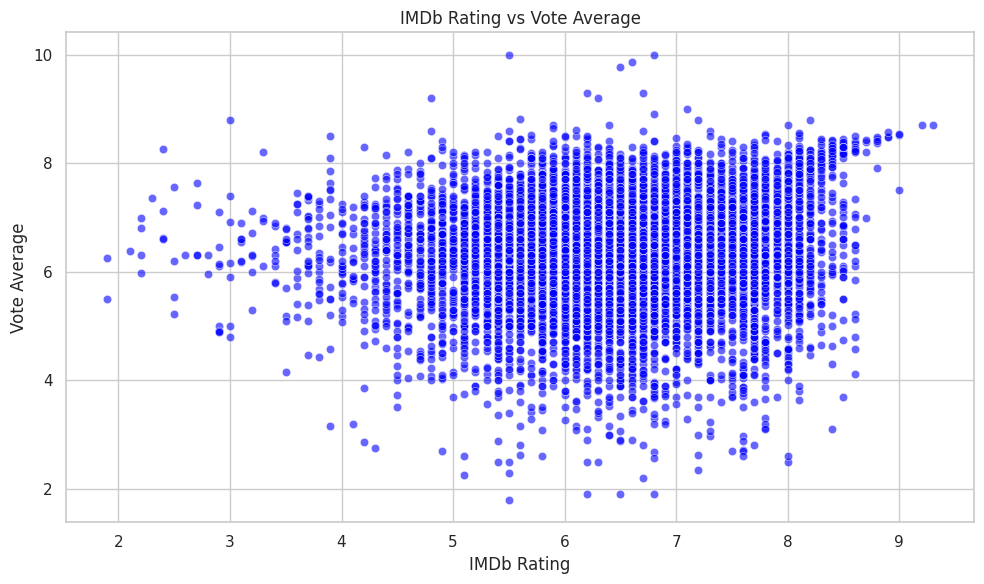

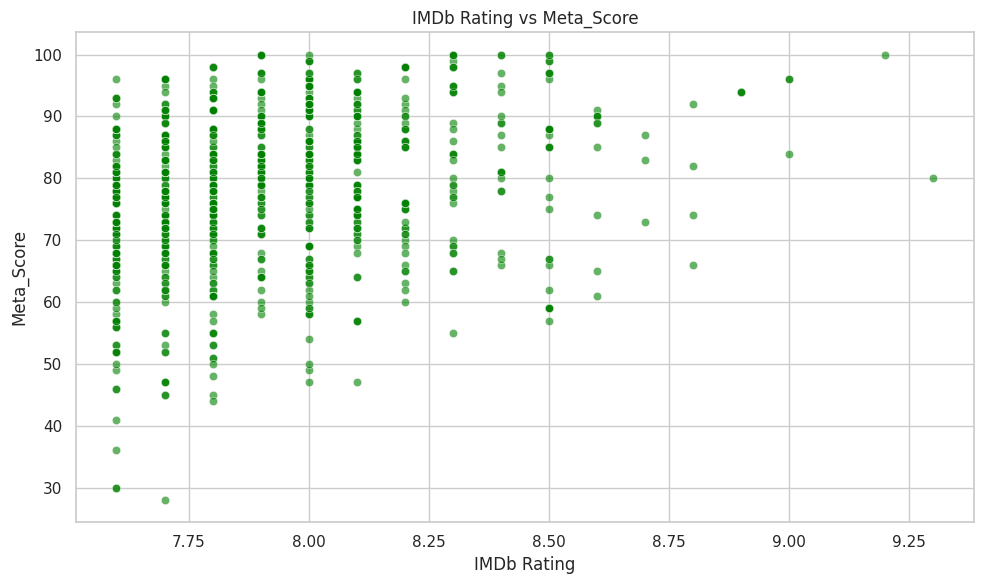

Correlation between IMDb Rating and Vote Average: 0.1635053301620899
Correlation between IMDb Rating and Meta Score: 0.25549931692037176


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with 'IMDB_Rating', 'vote_average', and 'meta_score'

# Set the style for the plots
sns.set(style="whitegrid")

# Scatter plot for IMDb Rating vs Vote Average
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='vote_average', data=data, color='blue', alpha=0.6)
plt.title('IMDb Rating vs Vote Average')
plt.xlabel('IMDb Rating')
plt.ylabel('Vote Average')
plt.tight_layout()
plt.show()

# Scatter plot for IMDb Rating vs Meta Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Meta_score', data=data, color='green', alpha=0.6)
plt.title('IMDb Rating vs Meta_Score')
plt.xlabel('IMDb Rating')
plt.ylabel('Meta_Score')
plt.tight_layout()
plt.show()

# Calculate correlation coefficients
correlation_vote = data['IMDB_Rating'].corr(data['vote_average'])
correlation_meta = data['IMDB_Rating'].corr(data['Meta_score'])

print(f"Correlation between IMDb Rating and Vote Average: {correlation_vote}")
print(f"Correlation between IMDb Rating and Meta Score: {correlation_meta}")


                                    production_companies       budget  \
269       20th Century Studios, Lightstorm Entertainment  460000000.0   
49221                   Tao Piao Piao, As One Production  417549000.0   
54707  Walt Disney Pictures, Jerry Bruckheimer Films,...  379000000.0   
53071  Universal Pictures, Original Film, One Race, P...  340000000.0   
25986  Jerry Bruckheimer Films, Second Mate Productio...  300000000.0   
...                                                  ...          ...   
57634               씨네넷, Lotte Entertainment, Mirovision          0.0   
57635                                             영화사 연두          0.0   
57636            영화사 장춘, Opus Pictures, Trinity Pictures          0.0   
57638                                               코라필름          0.0   
57639  프로덕션M, Michigan Venture Capital, Korea Picture...          0.0   

            revenue  
269    2.320250e+09  
49221  3.340392e+08  
54707  1.045714e+09  
53071  7.047097e+08  
25986  9.6100

<ipython-input-28-31ddb0b48f65>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='budget', y='production_companies', data=company_performance.head(10), palette='coolwarm')
<ipython-input-28-31ddb0b48f65>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='production_companies', data=company_performance.head(10), palette='coolwarm')


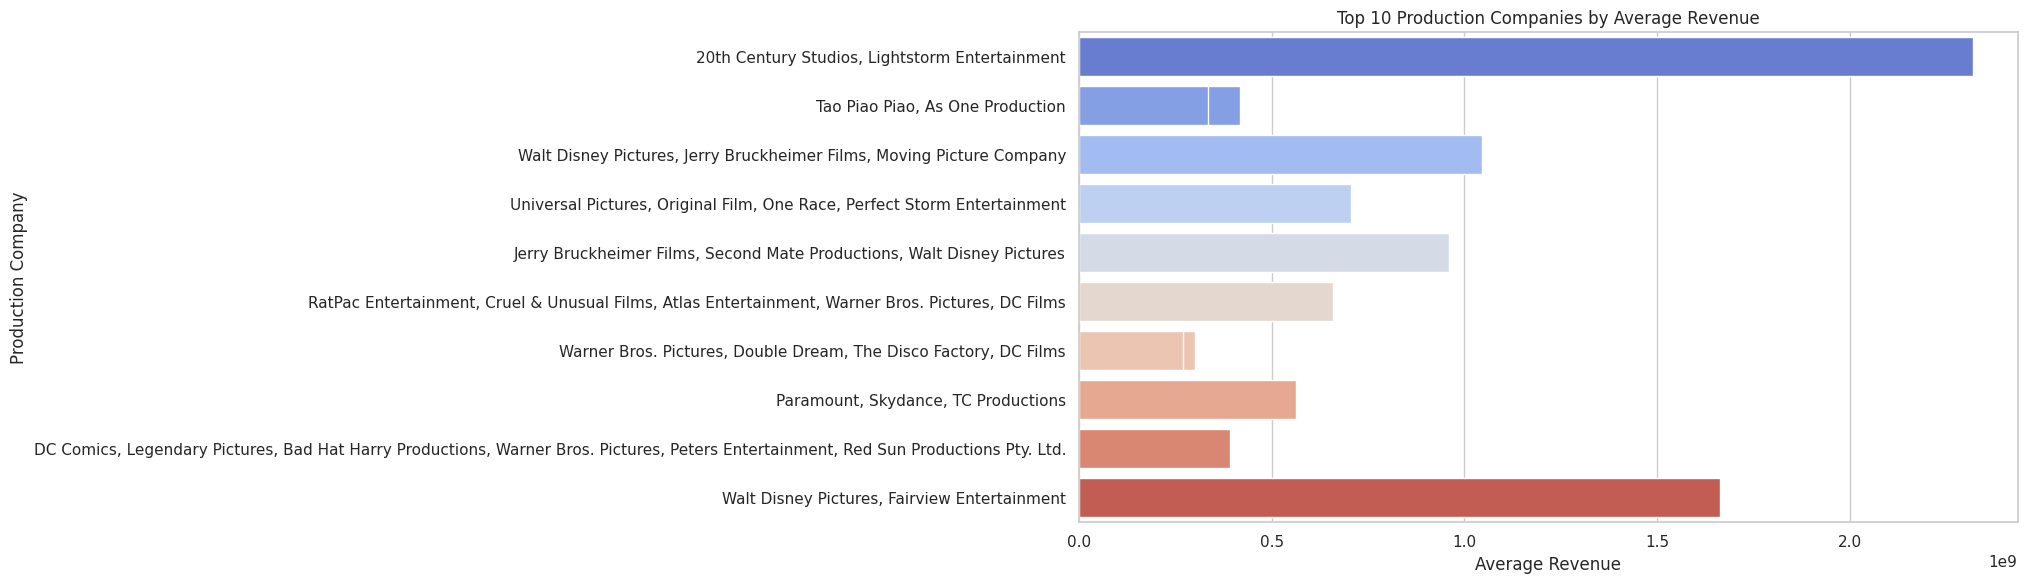

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with 'production_company', 'budget', and 'revenue'

# Group by production company and calculate average budget and revenue
company_performance = data.groupby('production_companies').agg({'budget': 'mean', 'revenue': 'mean'}).reset_index()

# Sort the results by budget and revenue
company_performance = company_performance.sort_values(by=['budget', 'revenue'], ascending=False)

# Display the top production companies
print(company_performance)

# Visualizing the top production companies by budget and revenue
plt.figure(figsize=(30, 6))

# Bar chart for average budget
plt.subplot(1, 2, 1)
sns.barplot(x='budget', y='production_companies', data=company_performance.head(10), palette='coolwarm')
plt.title('Top 10 Production Companies by Average Budget')
plt.xlabel('Average Budget')
plt.ylabel('Production Company')

# Bar chart for average revenue
plt.subplot(1, 2, 1)
sns.barplot(x='revenue', y='production_companies', data=company_performance.head(10), palette='coolwarm')
plt.title('Top 10 Production Companies by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Production Company')

plt.tight_layout()
plt.show()


                                 spoken_languages  vote_average     revenue
160         Arabic, English, Malay, Turkish, Urdu        10.000         0.0
184                Arabic, English, Turkish, Urdu        10.000         0.0
222                        Arabic, German, French        10.000         0.0
3015    Mandarin, English, Japanese, Korean, Thai         9.200    363000.0
1792  English, Spanish, Italian, Portuguese, Urdu         8.900         0.0
...                                           ...           ...         ...
2544                   German, Ukrainian, English         3.200         0.0
407          Bulgarian, English, Russian, Spanish         3.100         0.0
1514                     English, Japanese, Hindi         2.890  58228460.0
583                    Croatian, English, Italian         2.800         0.0
2012              French, Greek, English, Italian         2.525         0.0

[3645 rows x 3 columns]


<ipython-input-30-5713ae98b04b>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='vote_average', y='spoken_languages', data=language_performance.head(10), palette='coolwarm')
<ipython-input-30-5713ae98b04b>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y='spoken_languages', data=language_performance.head(10), palette='coolwarm')


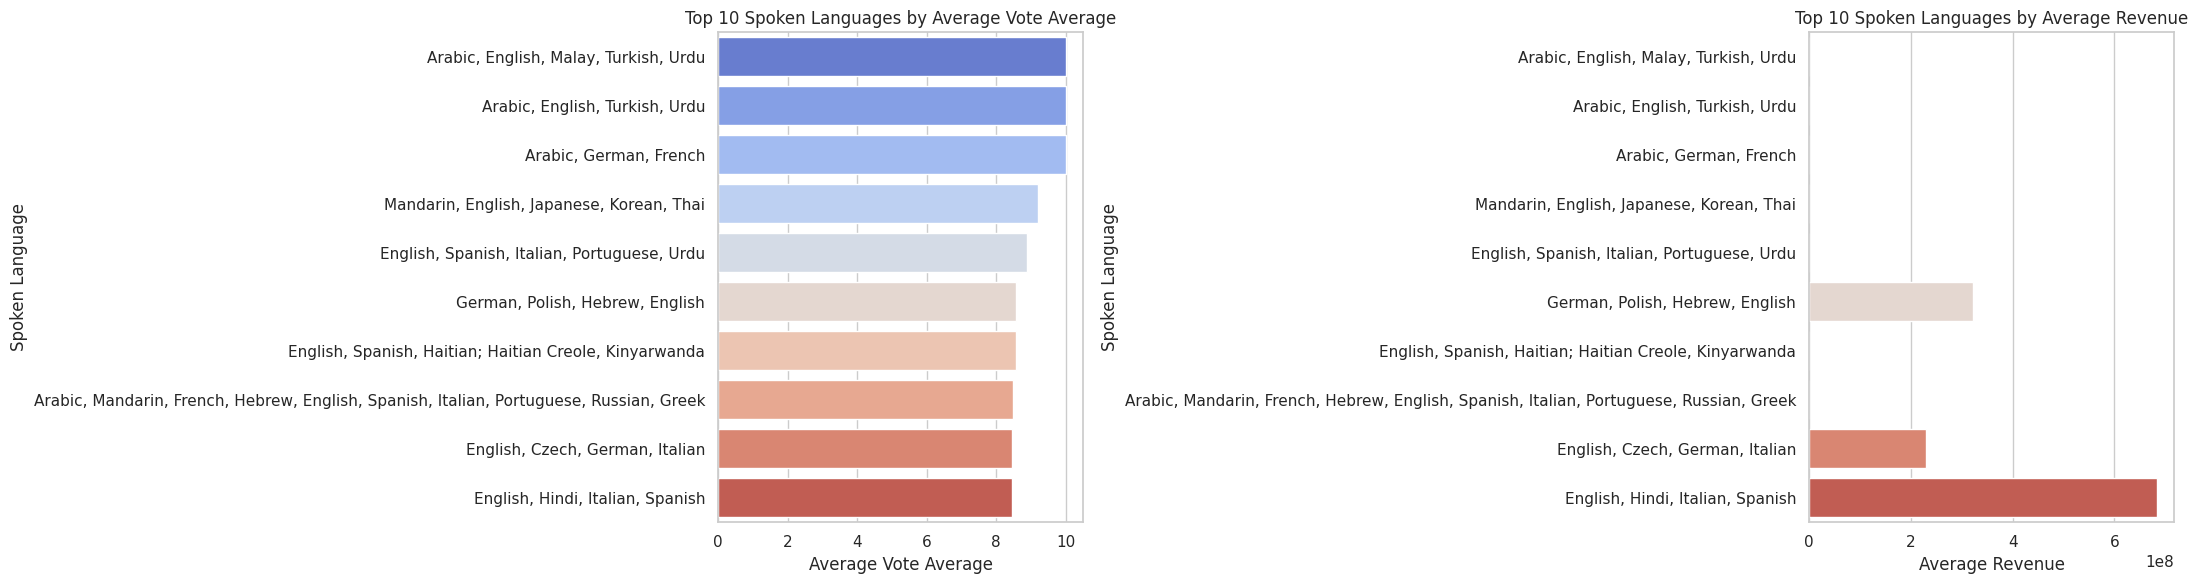

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame with 'spoken_language', 'vote_average', and 'revenue'

# Group by spoken language and calculate average vote average and revenue
language_performance = data.groupby('spoken_languages').agg({'vote_average': 'mean', 'revenue': 'mean'}).reset_index()

# Sort the results by vote average and revenue
language_performance = language_performance.sort_values(by=['vote_average', 'revenue'], ascending=False)

# Display the performance by spoken language
print(language_performance)

# Visualizing the performance by spoken language
plt.figure(figsize=(22, 6))

# Bar chart for average vote average
plt.subplot(1, 2, 1)
sns.barplot(x='vote_average', y='spoken_languages', data=language_performance.head(10), palette='coolwarm')
plt.title('Top 10 Spoken Languages by Average Vote Average')
plt.xlabel('Average Vote Average')
plt.ylabel('Spoken Language')

# Bar chart for average revenue
plt.subplot(1, 2, 2)
sns.barplot(x='revenue', y='spoken_languages', data=language_performance.head(10), palette='coolwarm')
plt.title('Top 10 Spoken Languages by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('Spoken Language')

plt.tight_layout()
plt.show()


                        Music_Composer                              Director  \
19920                    Pino Donaggio                          Terence Hill   
4130                  Christian Rainer                        Valeria Golino   
0                            2027Sound                          Tomohiko Ito   
16923                Michael Giacchino                          Victor Salva   
16931                     Michael Gore                           Alan Parker   
16930           Michael Gordon Shapiro                          James Nguyen   
16929     Michael Gonzales, Tobin Mori                            Justin Lin   
16928                    Michael Gibbs                     Stephen Poliakoff   
16927                    Michael Gibbs                          Raja Gosnell   
16926                    Michael Gibbs                           Ken Russell   
16925                    Michael Gibbs                          Bill Forsyth   
16924  Michael Giacchino, Nami Melumad  

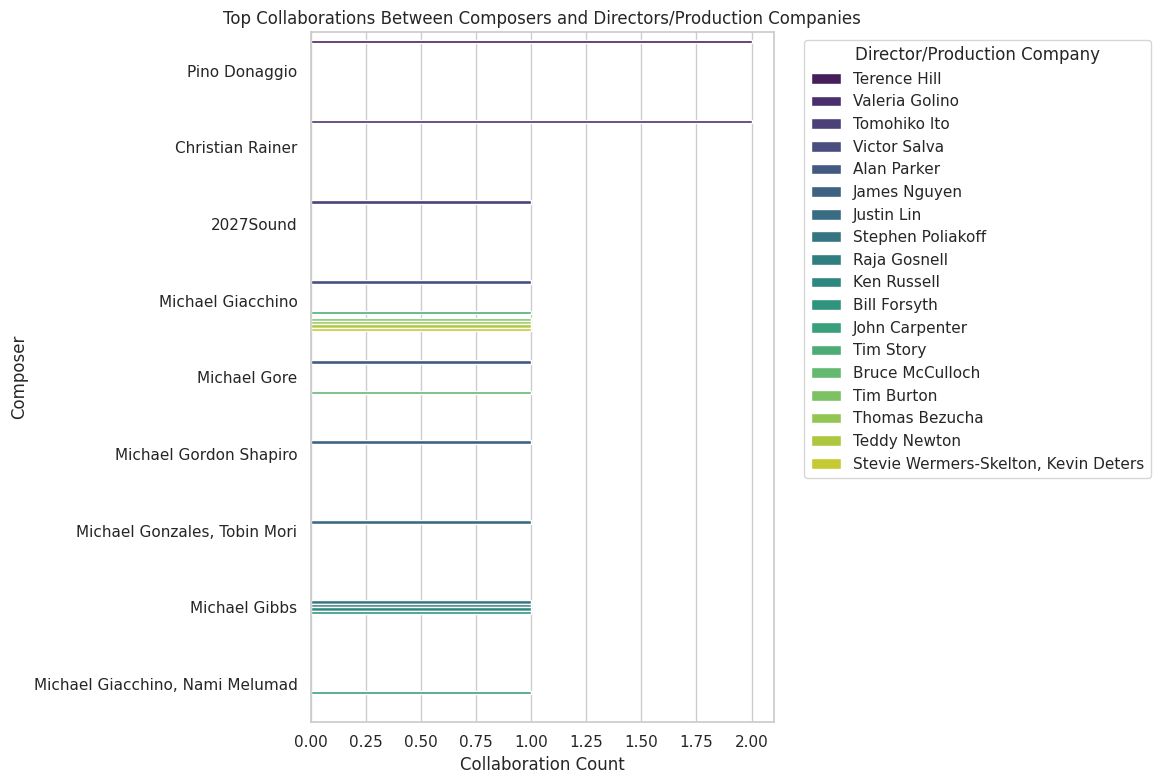

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data structure for the DataFrame
# Assuming 'data' is your DataFrame with 'composer', 'director', and 'production_company' columns

# Step 1: Create a DataFrame to count collaborations
collab_counts = data.groupby(['Music_Composer', 'Director','production_companies']).size().reset_index(name='collaboration_count')

# Step 2: Identify frequent collaborations (e.g., top collaborations)
top_collaborations = collab_counts.sort_values(by='collaboration_count', ascending=False).head(20)

# Display the top collaborations
print(top_collaborations)

# Step 3: Visualization of the top collaborations
plt.figure(figsize=(12, 8))
sns.barplot(x='collaboration_count', y='Music_Composer', hue='Director', data=top_collaborations, palette='viridis') # Changed 'composer' to 'Music_Composer
plt.title('Top Collaborations Between Composers and Directors/Production Companies')
plt.xlabel('Collaboration Count')
plt.ylabel('Composer')
plt.legend(title='Director/Production Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Sample structure of the DataFrame
# Assuming 'data' is your DataFrame with 'Release_Year', 'Title', 'Runtime', 'Rating', or 'Box_Office' columns

# Step 1: Sort the DataFrame to get the top hit movies based on rating or box office
# Sorting by 'Rating' or 'Box_Office' (whichever you have in your data)
top_movies = data.sort_values(by='IMDB_Rating', ascending=False).head(10)

# Step 2: Select the desired columns - Release Year, Title, and Runtime
top_movies = top_movies[['release_date', 'title', 'runtime']]

# Step 3: Display the top hit movies
print(top_movies)


     release_date                                          title  runtime
14     1994-09-23                       The Shawshank Redemption      142
53     1972-03-14                                  The Godfather      175
2      2008-07-16                                The Dark Knight      152
436    1957-04-10                                   12 Angry Men       97
9216   1994-08-03                            Eat Drink Man Woman      123
119    1993-12-15                               Schindler's List      195
9      1994-09-10                                   Pulp Fiction      154
20     2003-12-01  The Lord of the Rings: The Return of the King      201
0      2010-07-15                                      Inception      148
7      1999-10-15                                     Fight Club      139


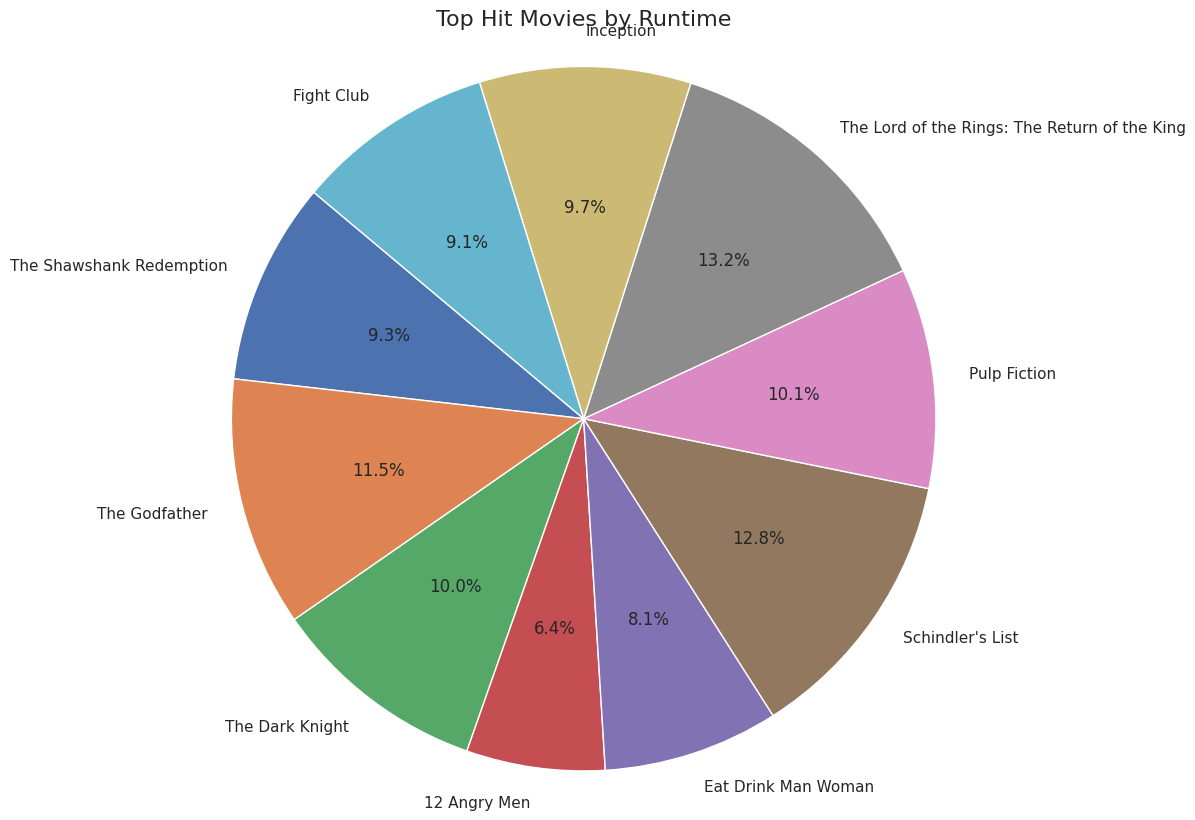

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample structure of the DataFrame
# Assuming 'data' is your DataFrame with 'Release_Year', 'Title', 'Runtime', 'Rating' or 'Box_Office' columns

# Step 1: Sort the DataFrame to get the top hit movies based on rating or box office
top_movies = data.sort_values(by='IMDB_Rating', ascending=False).head(10)

# Step 2: Select the desired columns - Title, and Runtime
top_movies = top_movies[['title', 'runtime']]

# Step 3: Create the pie chart
plt.figure(figsize=(10, 10))
plt.pie(top_movies['runtime'], labels=top_movies['title'], autopct='%1.1f%%', startangle=140)
plt.title('Top Hit Movies by Runtime', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()